# Module 3 Python Practice 

The exercises in this notebook are in Python using the ggplot and seaborn packages in Python. ggplot implementation in Python still has some issues, so do not be surprised if ggplot does not act the same way as in R. Seaborn is a very good package to plot statistical graphics in Python. Here, we will look at a few examples of plots in Python. The dataset used in this notebook is tipping information recorded in a restaurant and has the following attributes:

* total_bill in dollars
* tip in dollars
* sex of the payer 
* whether there were smokers in the party
* day of the week
* time of day
* size of the party

### References for plotting in Python

**Reference** [Visualizations in python](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

**Reference** [ggplot in python](http://ggplot.yhathq.com/docs/index.html)

**Reference** [Seaborn](http://seaborn.pydata.org/tutorial.html)

Read the data from tips text file in "../../../datasets/tips.txt" into the dataframe called tips_data

In [1]:
import pandas as pd
from ggplot import *

tips_data = pd.read_csv('../../../datasets/tips.txt')
tips_data.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [2]:
tips_data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

**Activity 1: ** Draw a line graph using ggplot library for tips vs total_bill. plot total_bill on x axis and tips on y axis.

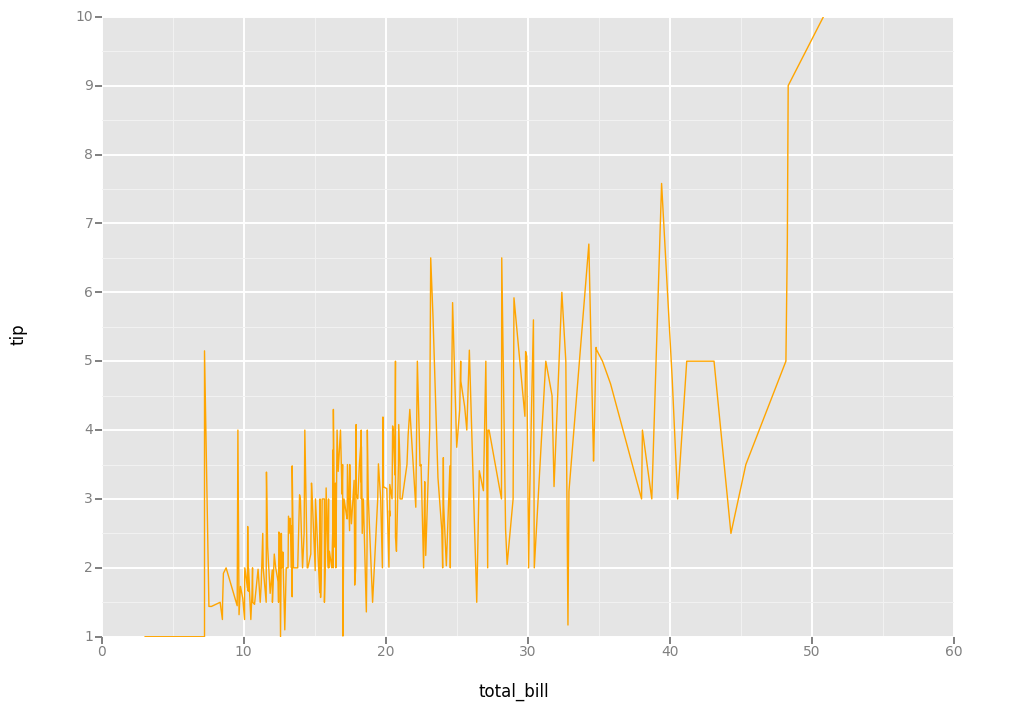

<ggplot: (-9223363307161743044)>

In [3]:
ggplot(tips_data, aes('total_bill','tip')) + geom_line(color='orange')

A line graph will shows the trend. Here tips can be seen increasing with increasing total bill, but there must be other variables that effect this relationship as we do not see a linear relationship. Let's look at different *facets* of the data set.

**Activity 2: ** Plot a bar chart where the height of the bar shows the **number** of tips per day.

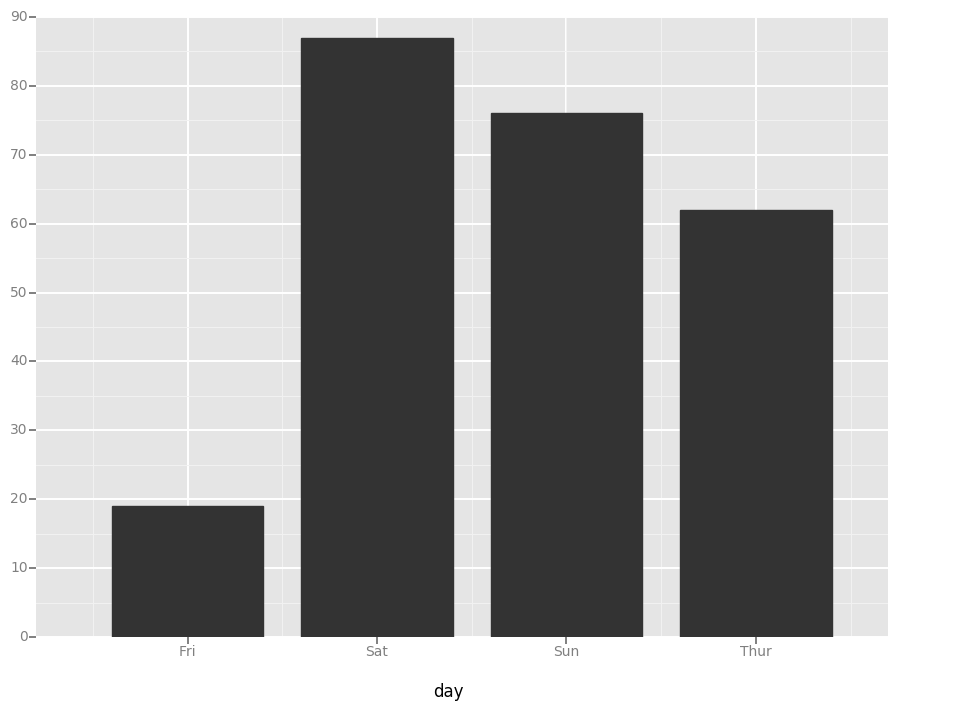

<ggplot: (8729815725779)>

In [4]:
# geom_bar by itself will count the data items in each day.
ggplot(tips_data, aes(x="day")) + geom_bar()

**Activity 3: ** Plot a bar chart where the height of the bar shows the **total amount** of tips per day.

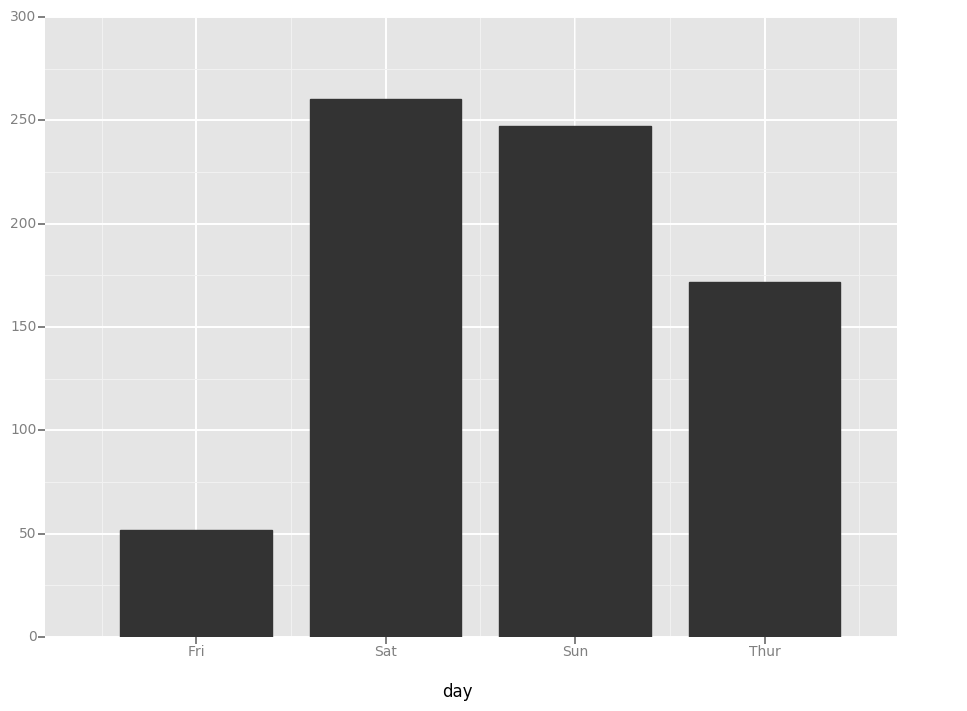

<ggplot: (8729815685282)>

In [5]:
# By adding the weight parameter, we are computing a weighted count that is the sum of tips. 
ggplot(tips_data, aes(x="day", weight="tip")) + geom_bar() 

**Activity 4: ** Plot bar charts where the heights of the bars show the **total amount of bills** per day for different genders and smoker status.

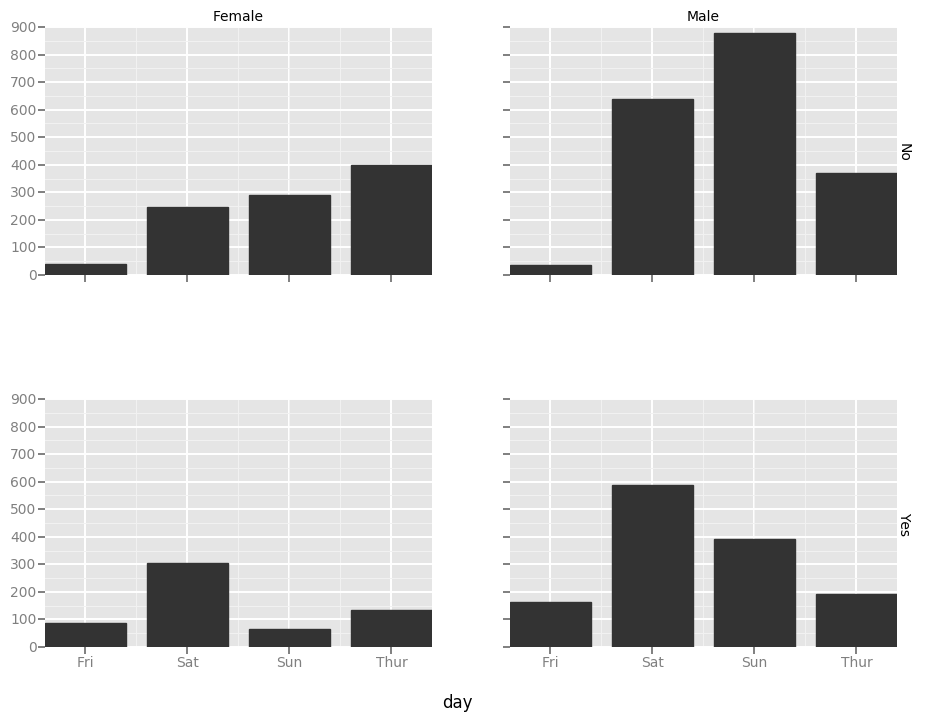

<ggplot: (-9223363307039114976)>

In [6]:
# By using facets, we can create four plots without looping. 
ggplot(tips_data, aes(x="day", weight="total_bill")) + geom_bar() + facet_grid('smoker','sex')

**Activity 5: ** Plot a **histogram** for total_bill variable using variables sex and smoker as facets using seaborn package.

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
g = sns.FacetGrid(tips_data,row="smoker",col="sex")
g.map(plt.hist, "total_bill")

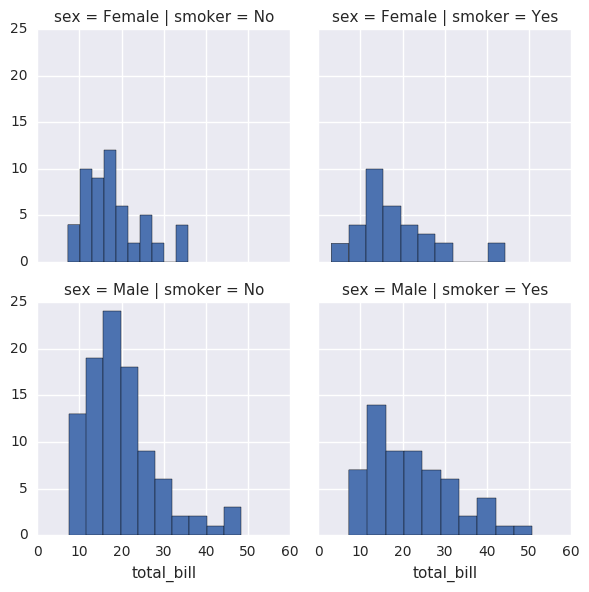

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(plt.hist, "total_bill")

**Activity 6: ** Draw a scatterplot for variables total_bill and tip using sex and smoker as facets.

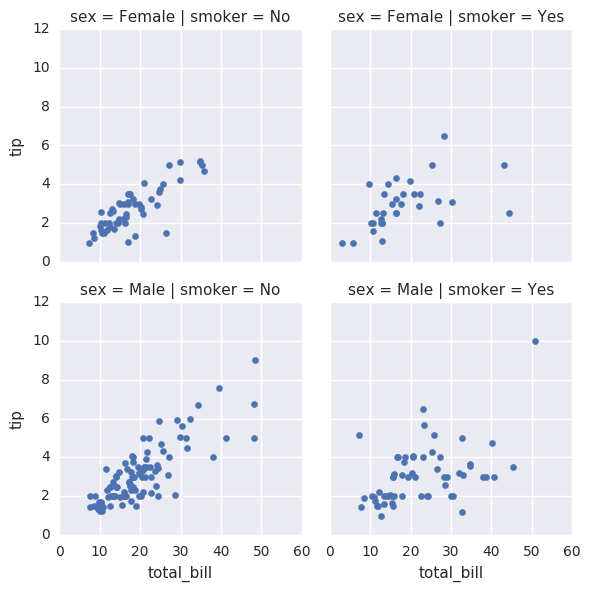

In [8]:
g = sns.FacetGrid(tips_data, row="sex", col="smoker")
g.map(plt.scatter, "total_bill", "tip")

**Activity 7: ** Draw a scatterplot for variables total_bill and tip using sex and smoker columns as facets. **Map hue to the variable 'day'.**

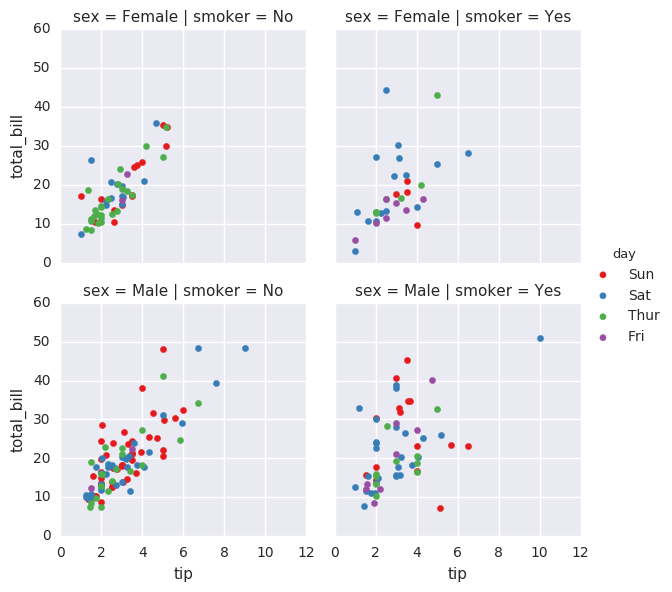

In [9]:
g = sns.FacetGrid(tips_data, row="sex", col="smoker",hue='day',palette="Set1")
g.map(plt.scatter, "tip", "total_bill")
g.add_legend()

**Activity 8: ** Do the same in ggplot.

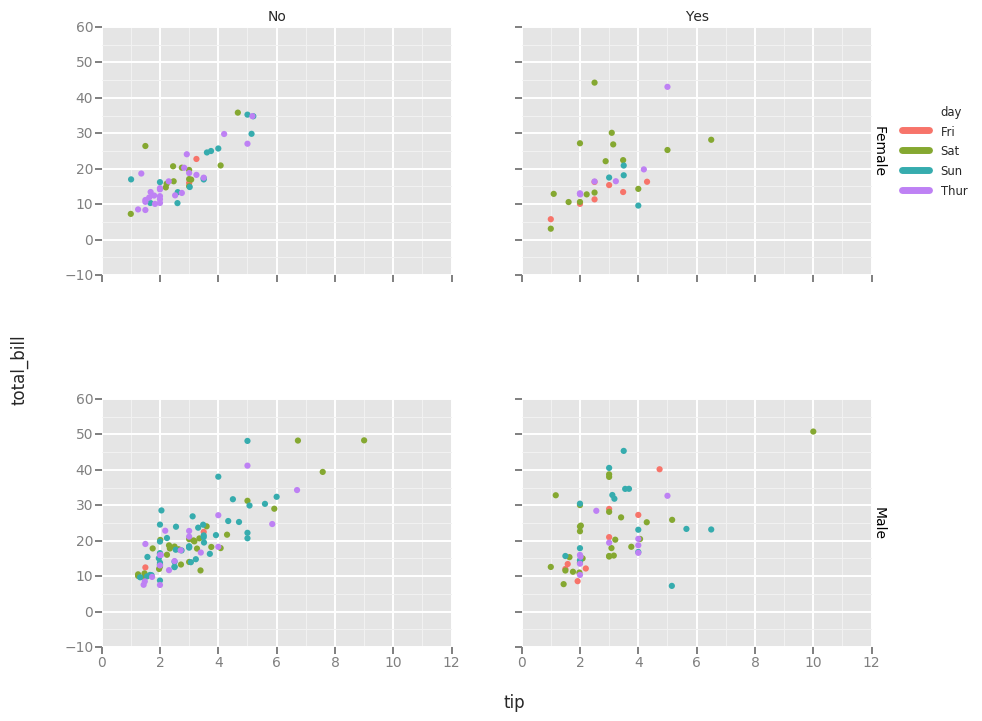

<ggplot: (-9223363307162642821)>

In [10]:
from ggplot import *

p = ggplot(tips_data, aes(x='tip', y='total_bill',colour='day'))
p + geom_point() + facet_grid("sex", "smoker")


This was pretty bad choice of colors since the day attribute is ordinal; it does have an order. Let's use an adequate color palette for it.

**Activity 7: ** Draw a scatterplot for variables total_bill and tip using sex and smoker columns as facets. Map the colour and size of the points to 'day' and 'size' attributes, respectively.

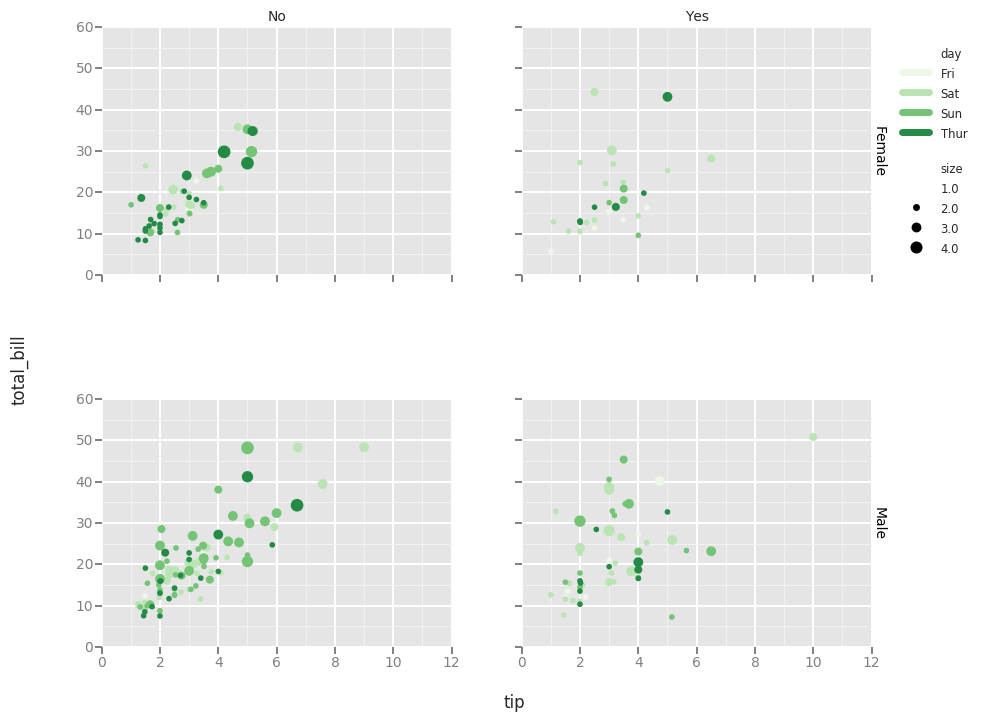

<ggplot: (8729692213743)>

In [11]:
from ggplot import *

p = ggplot(tips_data, aes(x='tip', y='total_bill',colour='day',size='size'))
p + geom_point() + facet_grid("sex", "smoker")
p + scale_color_brewer(type='sequential', palette=5)